<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/GradientDesc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# New Section




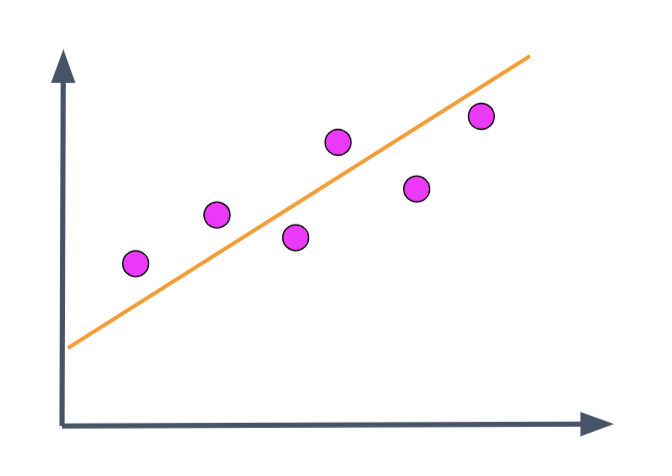

# Ordinary Linear Regression

$\text{Given data }y \text{ satisfying the IID requirement: (Independent and drawn from the Identically same Distribution) } $
$$y = X.w + e $$
$ X \text{ are the independent variables and } y \text{ are the dependent variables and } w \text{ the regression coefficients (or weights), and } e \text{ is the error} $

$\text{Writing this out as an example in } (x, y) \text{ space}$
$$\left\{ 
  \begin{aligned}
    y_1 \\ y_2 \\ . \\y_n
  \end{aligned}
  \right\}=
  \begin{bmatrix} 1 & x_{1}  \\ 1 & x_{2}  \\ 1 & x_{3}  \\ ... \\ 1 & x_{n} \end{bmatrix}
  \begin{equation}
\left\{ 
  \begin{aligned}
    w_0 \\ w_1
  \end{aligned}
  \right\} + e
\end{equation}
$$

$\text{Linear algebra tells us that } X^T.e=0 $
$$y = X.w + e $$
$\text{ so multiplying through by } X^T $
$$ X^T y=X^T Xw  $$

$$ w = (X^T X)^{-1} X^T y $$



$\text{So we can define a solution by matrix inversion. However, for large problems, and more generally in machine learning, we define a least squares loss function }$
$$ E =\sum |y - X.w|^{2} $$
$\text{where } y \text{ is the actual data and } Xw \text{ is the model prediction} $ 
$\text{ We can find the gradient of } E \text{ with respect to } w $
\begin{equation}
\frac{\partial E}{\partial w} = \sum (y - X.w).X = G
\end{equation}
$\text{ We need to update } w \text{ so that E, the loss function decreases } w $
$$w_n = w_{n-1} - \bigtriangleup G $$
$\text{ We introduce a learning rate } \eta $
$$w_n = w_{n-1} - \eta G $$

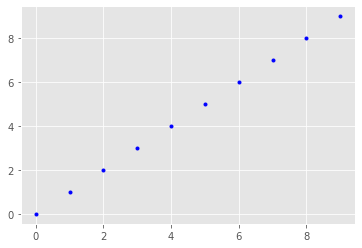

In [31]:
npoints = 10
x = np.arange(npoints,1)
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))      # add a row of 1 to represent the constant term
w = np.array([0,1])
xt = np.transpose(x)
y = np.dot(xt, w)               # equivalent to y = m*x + c
# later we use the function y = model(w, xy) to achieve the same
plt.plot(x[1], y, 'b.')

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import time
plt.style.use(['ggplot'])

def gradient_descent(xy, max_iterations, w,
                     obj_func, mse_func, grad_func, extra_param=[],
                     learning_rate=0.05, momentum=0.8):
    (x, y) = xy

    w_history = w
    f_history = obj_func(w, x)
    cost_history = mse_func(w, xy)
    delta_w = np.zeros(w.shape)
    i = 0
    while i < max_iterations:
        delta_w = -learning_rate * grad_func(w, xy)
        w = w + delta_w
        # store the history of w and f
        w_history = np.vstack((w_history, w))
        ypredicted = obj_func(w, x)
        f_history = np.vstack((f_history, ypredicted))
        cost_history = np.vstack((cost_history, mse_func(w, xy)))
        i = i + 1
    return w_history, f_history, cost_history


def grad_mse(w, xy):
    (x, y) = xy
    (rows, cols) = x.shape
    # Compute the output
    ypredicted = model(w, x)
    diff = y - ypredicted
    grad = -np.dot(x, diff)   # this gives gradient of both w's
    return grad

# Input argument is weight and a tuple (train_data, target)


def mse(w, xy):
    (x, y) = xy
    xt = np.transpose(x)
    ypredicted = np.dot(xt, w)
    loss = np.sum((y - ypredicted)*(y - ypredicted))
    m = 2 * len(y)
    loss = loss / m
    return loss


def model(w, x):
    xt = np.transpose(x)
    ypred = np.dot(xt, w)
    return ypred


In [41]:

ndim = 2
npoints = 3
w_init = np.array([0, 1])
wt = np.transpose(w_init)
myones = np.ones(npoints)
x = np.arange(0, npoints)
x = np.vstack((myones, x))
xt = np.transpose(x)  # this should be an npoints x 2 matrix
y = np.dot(xt, w_init)
y = y + 1
xy = (x, y)
print(xy)
max_iterations = 100
w_hist, f_hist, c_hist = gradient_descent(
    xy, max_iterations,  w_init, model, mse, grad_mse, learning_rate=0.1, momentum=0.8)
print(f'W: {w_hist}')
print(f'cost function: {f_hist}')

(array([[1., 1., 1.],
       [0., 1., 2.]]), array([1., 2., 3.]))
W: [[0.         1.        ]
 [0.3        1.3       ]
 [0.42       1.36      ]
 [0.486      1.354     ]
 [0.534      1.3312    ]
 [0.57444    1.3054    ]
 [0.610488   1.280368  ]
 [0.6432312  1.2570376 ]
 [0.67315056 1.23554944]
 [0.70054056 1.21582955]
 [0.72562953 1.19775261]
 [0.74861489 1.18118745]
 [0.76967419 1.16600926]
 [0.78896915 1.15210237]
 [0.8066477  1.13936044]
 [0.82284525 1.12768591]
 [0.8376859  1.11698938]
 [0.85128332 1.10718892]
 [0.86374165 1.09820946]
 [0.87515631 1.08998224]
 [0.88561475 1.08244422]
 [0.89519706 1.07553769]
 [0.90397663 1.06920973]
 [0.91202073 1.06341187]
 [0.91939095 1.05809972]
 [0.92614375 1.05323258]
 [0.93233085 1.04877316]
 [0.93799965 1.04468733]
 [0.94319355 1.04094377]
 [0.94795236 1.03751382]
 [0.9523125  1.0343712 ]
 [0.95630739 1.03149185]
 [0.95996762 1.02885371]
 [0.96332122 1.02643657]
 [0.96639388 1.02422192]
 [0.96920914 1.02219279]
 [0.97178856 1.02033365]
 [0.97

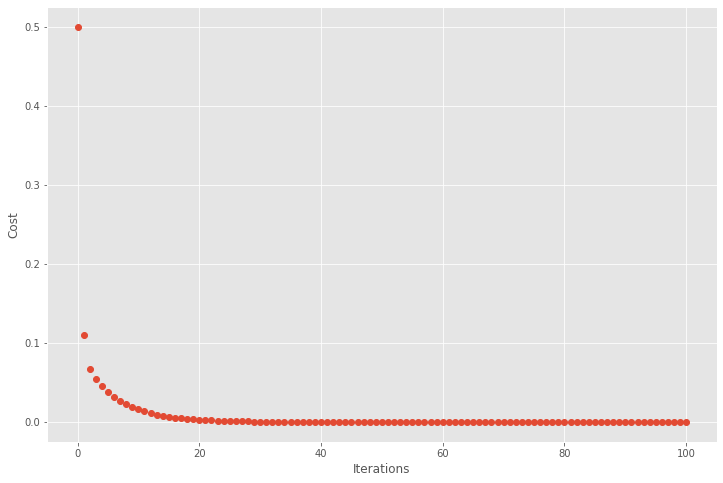

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
iterations = len(c_hist)
_ = ax.plot(range(iterations), c_hist, 'o')
fig.show()

In [44]:
def plot_GD(xy, w, max_iterations,learning_rate,ax,ax1=None):
  y = np.dot(xt, w)
  _ = ax.plot(x[1],y,'b.')
  
  tr = 0.5
  for i in range(max_iterations):
    pred_prev = xt.dot(wt)
    w_hist, f_hist, c_hist = gradient_descent( xy, max_iterations-1, w, model, mse, grad_mse, [], learning_rate=0.05, momentum=0.8)
    pred = xt.dot(wt)
    if ((i % 2 == 0) ):
      ypred = f_hist[i]
      _ = ax.plot(x[1],ypred, 'b-',alpha=tr)
      if tr < 0.8:
        tr = tr+0.2   
    if not ax1== None:
      _ = ax1.plot(range(n_iter),c_hist,'o')  

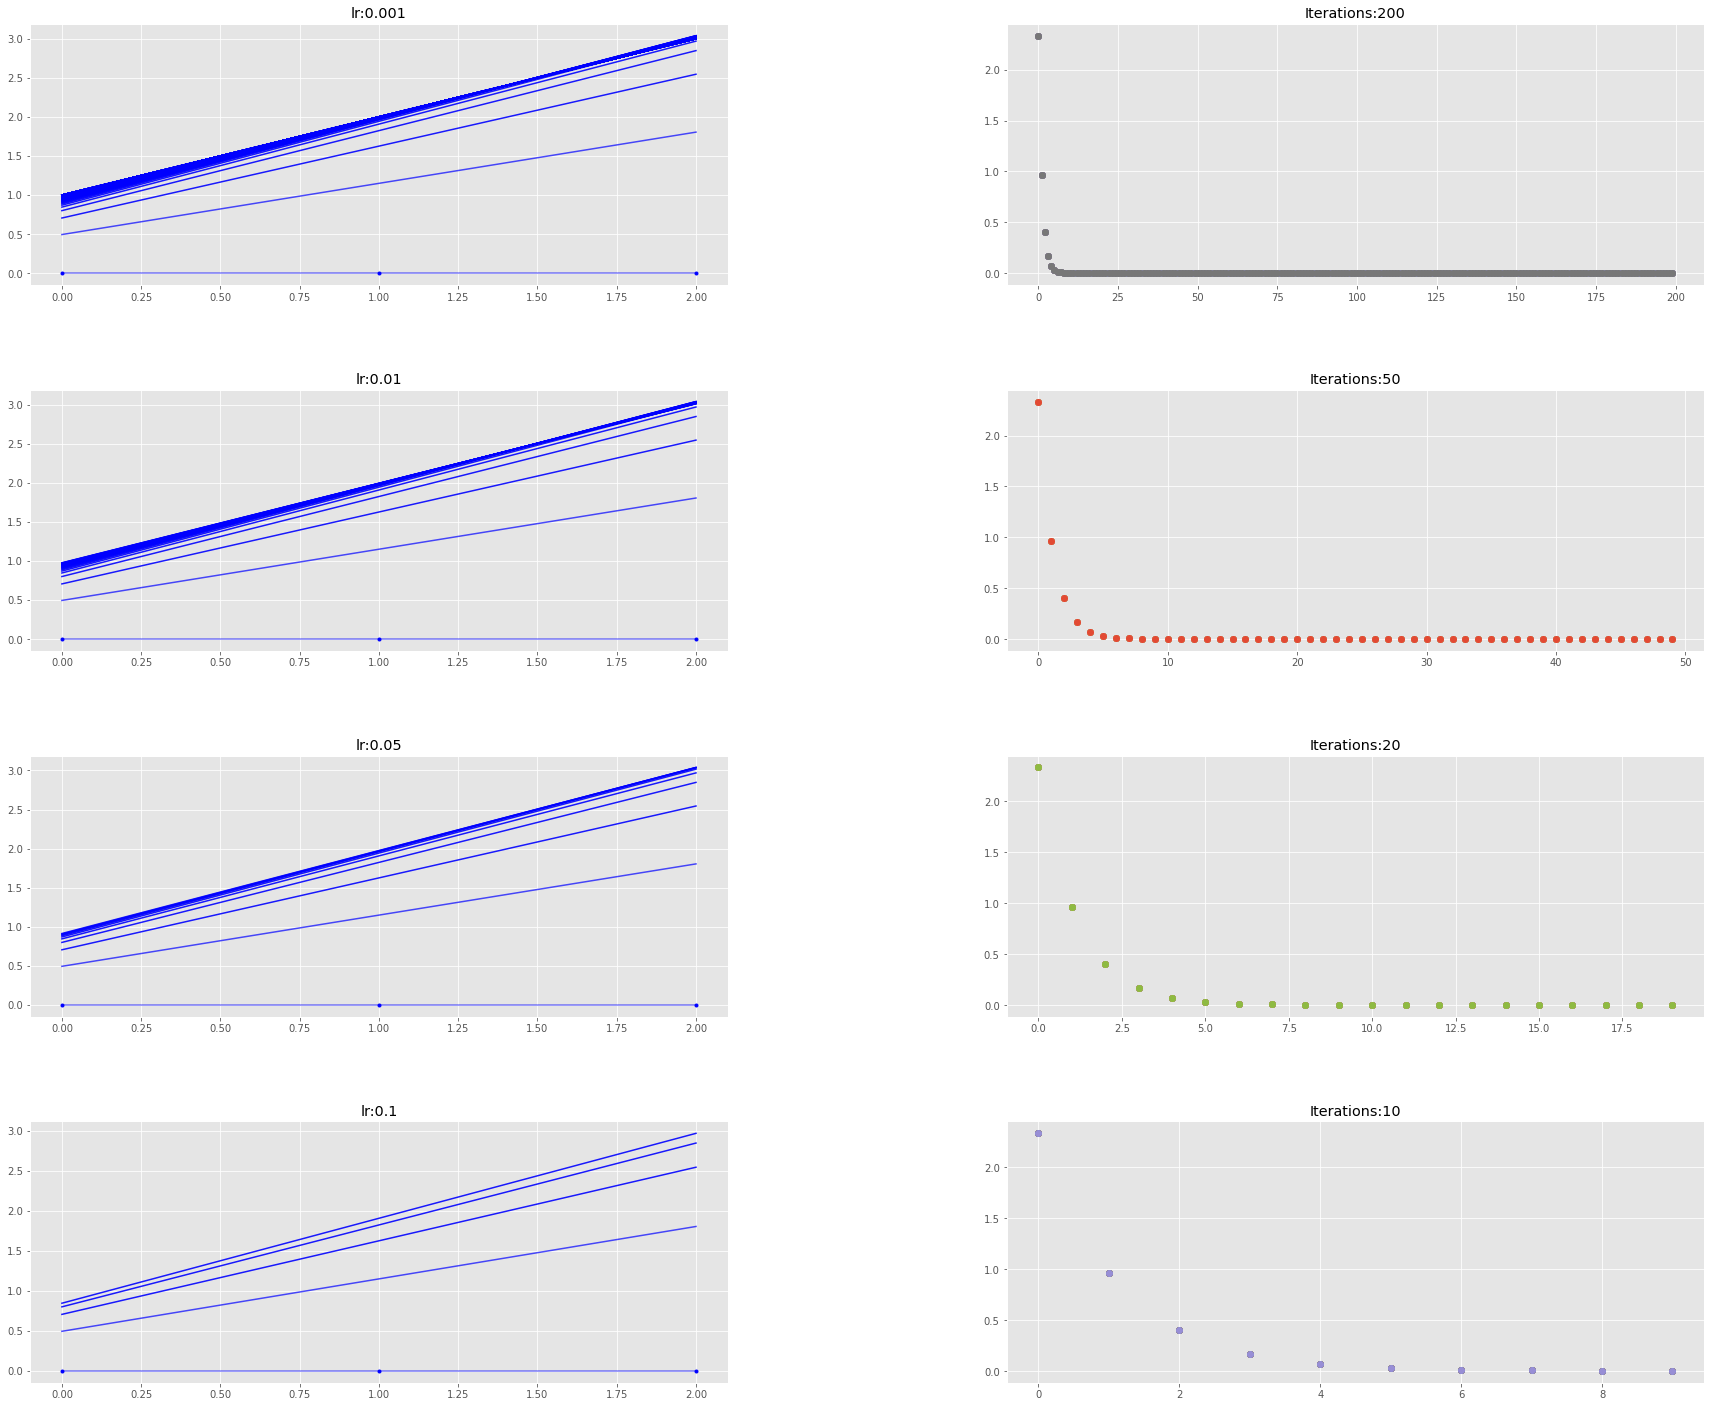

In [45]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
w = np.array([0,0])
it_lr =[(200,0.001),(50,0.01),(20,0.05),(10,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4, 2, count)
    count += 1
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(xy, w, n_iter, lr, ax, ax1)
    

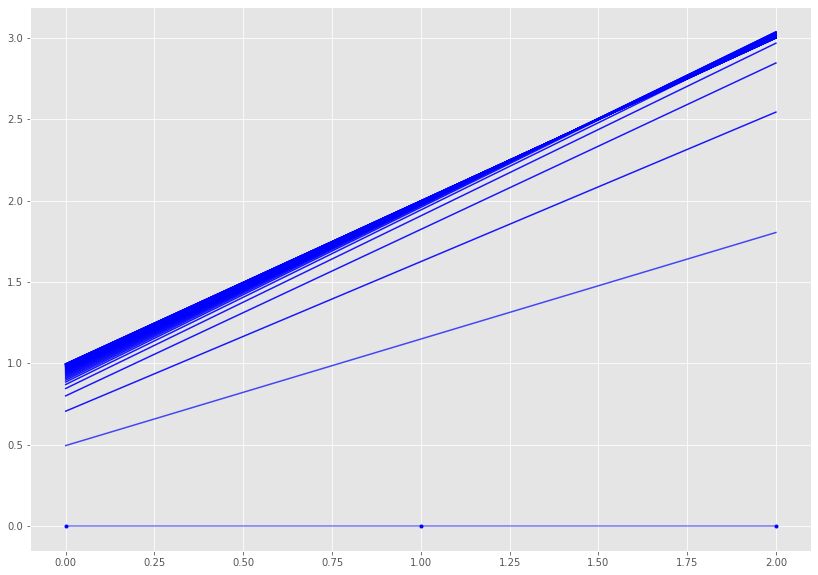

In [46]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(xy, w, 100,0.1,ax)


In [ ]:
from matplotlib.pyplot as plt
import numpy as np

npoints = 100
nslice = 10
x = np.arange(0, npoints, 1)
w = [3,2].    # [w0, w1]
k = 0.001

noise = np.random.rand(npoints)
wLast = [0,1]

y = x*w + noise + b   # generaty y and add noise

# keep track of gradient descent
wHist = []
bHist = []


def get_slice(x, y, n):
    start = np.random.randint(0, npoints)
    return x[start:start+n], y[start:start+n]


def get_gradient_w(w_gradient, b, x, y):
    diff = 2*(y - w_gradient*x - b)
    #print(f" diff: {diff}")
    n = len(x)
    delta_w = np.sum(diff*x)
    # print(delta_w)
    w_gradient = w_gradient + k*delta_w/n
    return w_gradient


for i in range(10):
    x_slice, y_slice = get_slice(x, y, nslice)

    wLast = get_gradient_w(wLast, bLast, x_slice, y_slice)
    bLast = get_gradient_b(wLast, bLast, x_slice, y_slice)
    wHist.append(wLast)
    bHist.append(bLast)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(len(wHist)), wHist, c='b', marker='o')
ax.plot(np.arange(len(bHist)), bHist, c='r', marker='x')


ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

##plt.plot(x, ys, '-')
#plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()


In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),c_hist,'b.')